In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil

import scipy
import regex as re

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

# IO

In [2]:
cs = dict()

db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    dict(name="test", id="impurity_diags_test", guard_replace = False, unnormalise = True), 
]

for case in toload:
    cs[case["name"]] = Load.case_1D(db.casepaths[case["id"]], guard_replace = case["guard_replace"], unnormalise = case["unnormalise"])


Skipping unnormalisation


In [ ]:


[print(x) for x in ds.data_vars if x.startswith("R")]

Rd+_ex
Rd+_rec
Rne+2_ex
Rne+3_ex
Rne+4_ex
Rne+5_ex
Rne+6_ex
Rne+7_ex
Rne+8_ex
Rne+9_ex
Rne+_ex
Rne_ex


[None, None, None, None, None, None, None, None, None, None, None, None]

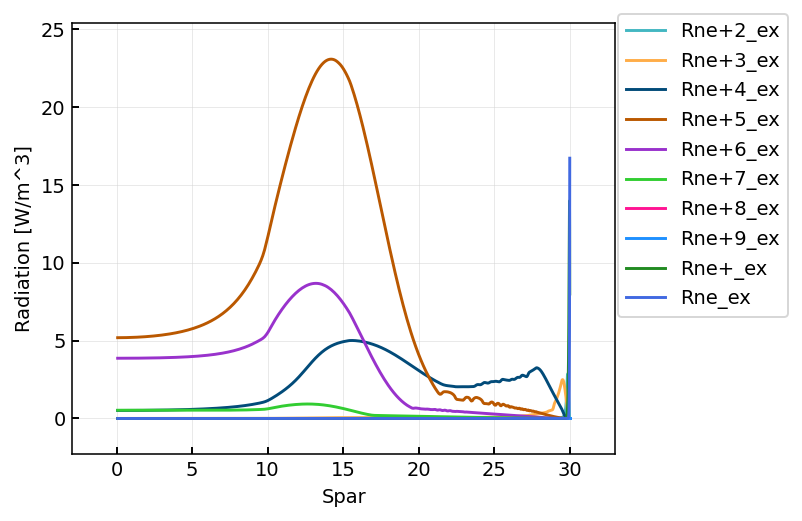

In [13]:
ds = cs["test"].ds.isel(pos = slice(2,-2))

fig, ax = plt.subplots()

for x in ds.data_vars:
    if x.startswith("R") and "d+" not in x:
        ax.plot(ds["pos"], ds[x]*-1, label = x)
        
ax.set_ylabel("Radiation [W/m^3]")
ax.set_xlabel("Spar")
fig.legend(bbox_to_anchor=(1.15,0.9))
# ax.set_yscale("log")
# [print(x) for x in ds.data_vars if x.startswith("R")]